# Heart Disease Prediction using Machine Learning
This notebook looks in to use various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someine has heart disease based on their medical attributes.

Approach Used:
1. Problem defination 
2. Data
3. Evaluation 
4. Features 
5. Modelling 
6. Experimentation

## 1. Problem Defination 

> Based on given clinical parameters about the patient, can we predict whether they have heart disease or not?

## 2. Data 
> The data used here for this project is synthetically generated for project purpose.

## 3. Evaluation 
> The ultimate goal is to identify a model that offers high predictive performance without overfitting, supports clinical decision-making, and generalizes well to unseen patient data.

## 4. Feaatures 
> Data dictionary:

1. age: Age of the individual in years.
   
2. sex: Gender of the individual (1 = male, 0 = female)

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :

* 0 = typical angina

* 1 = atypical angina

* 2 = non — anginal pain

* 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.

* If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

7.  restecg- Resting ECG : displays resting electrocardiographic results
* 0 = normal

* 1 = having ST-T wave abnormality

* 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina : 1 = yes 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment :

* 0 = upsloping: better heart rate with excercise (uncommon)
* 1 = flat: minimal change (typical healthy heart)
* 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. thal : Displays the thalassemia :

* 1,3 = normal
* 6 = fixed defect
* 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individual is suffering from heart disease or not :
1 = yes 0 = no

## Preparing the tools 
* Tools used: pandas , Matplotlib and numpy for data analysis and manupulation

In [183]:
# Import all the tools

# EDA plotting libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

# Ensure plots appear inside the notebook
%matplotlib inline 

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier

# Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV  
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings("ignore")

## Load our data 

In [239]:
df = pd.read_csv("heart-disease-data.csv")
df.shape

(150000, 14)

## Data Exploration (Exploratory data analysis or EDA) 

 1. what questions are you trying to solve?
 2. what kind of data do we have and how do we treat different types?
 3. whats missing from the data and how do we deal eith it?
 4. where are the outliers and why should you care about them?
 5. how can you add, change or remove features to get more out of your data?

In [240]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [241]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
149995,57.0,1.0,0.0,116.0,262.0,0.0,1.0,118.0,1.0,2.0,1.0,1.0,3.0,0.0
149996,63.0,1.0,1.0,153.0,266.0,1.0,0.0,147.0,0.0,2.0,1.0,3.0,3.0,0.0
149997,56.0,0.0,0.0,127.0,299.0,0.0,0.0,160.0,0.0,0.0,2.0,1.0,2.0,1.0
149998,59.0,0.0,2.0,154.0,251.0,0.0,1.0,166.0,0.0,1.0,2.0,0.0,2.0,1.0
149999,65.0,1.0,2.0,159.0,244.0,0.0,0.0,142.0,0.0,1.0,2.0,0.0,1.0,1.0


In [242]:
# chec if there are any missing values
df.isna().sum()

age         19
sex         11
cp          14
trestbps    17
chol         9
fbs         14
restecg     15
thalach     17
exang       10
oldpeak     11
slope       15
ca          18
thal        12
target      21
dtype: int64

In [243]:
# Removing missing values
df.dropna(inplace = True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149797 entries, 0 to 149999
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       149797 non-null  float64
 1   sex       149797 non-null  float64
 2   cp        149797 non-null  float64
 3   trestbps  149797 non-null  float64
 4   chol      149797 non-null  float64
 5   fbs       149797 non-null  float64
 6   restecg   149797 non-null  float64
 7   thalach   149797 non-null  float64
 8   exang     149797 non-null  float64
 9   oldpeak   149797 non-null  float64
 10  slope     149797 non-null  float64
 11  ca        149797 non-null  float64
 12  thal      149797 non-null  float64
 13  target    149797 non-null  float64
dtypes: float64(14)
memory usage: 17.1 MB


In [245]:
# Find out how many of each class are there.
df["target"].value_counts()

target
1.0    87191
0.0    62606
Name: count, dtype: int64

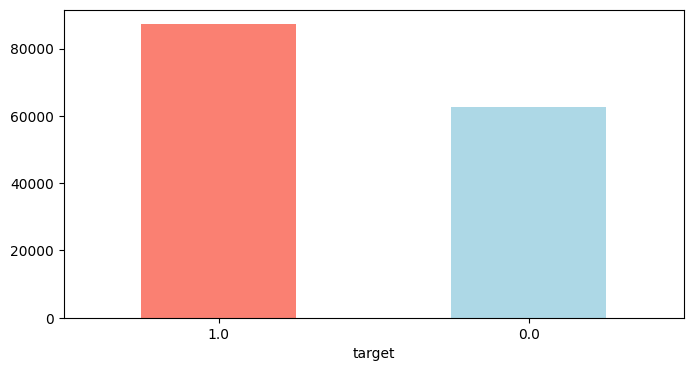

In [246]:
df["target"].value_counts().plot(kind="bar",figsize=(8,4), color=["salmon", "lightblue"]),
plt.xticks(rotation=0);

In [247]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000,149797.000000
mean,54.196599,0.694653,1.006716,131.027050,245.908409,0.138821,0.522000,150.035942,0.299392,1.001282,1.433313,0.707197,2.327069,0.582061
std,7.489518,0.460556,0.884084,15.117991,43.334882,0.345761,0.514151,19.216909,0.457993,0.959998,0.573272,0.911028,0.584496,0.493222
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,120.000000,216.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000
75%,59.000000,1.000000,2.000000,139.000000,270.000000,0.000000,1.000000,164.000000,1.000000,2.000000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,205.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequecy according to sex

In [248]:
df.sex.value_counts()

sex
1.0    104057
0.0     45740
Name: count, dtype: int64

In [249]:
# compare target column with sex column 
pd.crosstab(df["target"], df["sex"])

sex,0.0,1.0
target,,
0.0,8851,53755
1.0,36889,50302


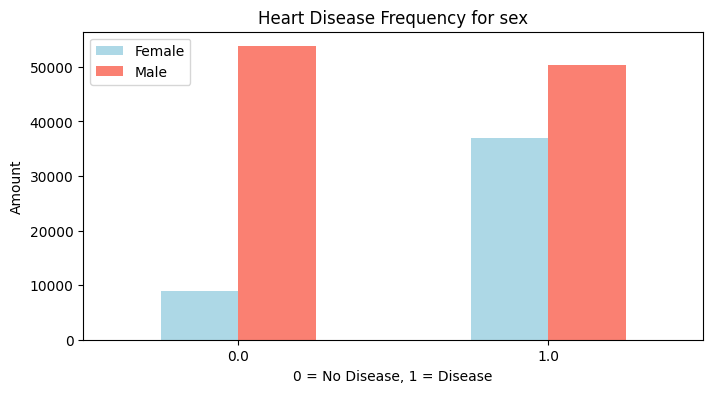

In [250]:
#Plotting Graph
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(8,4),
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Age vs Max Heart Rate for Heart Disease


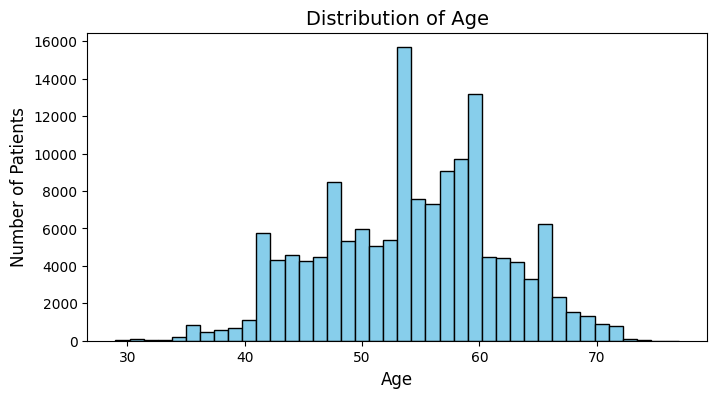

In [251]:
# Check the distribution of the age column with a histogram
df.age.plot.hist(figsize=(8,4), bins=40, color="skyblue", edgecolor="black");

# Add titles and labels
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12);

In [252]:
### Heart Disease Frequency per Chest Pain Type
pd.crosstab(df.cp, df.target)

target,0.0,1.0
cp,,
0.0,45585,7156
1.0,11476,37133
2.0,5398,37749
3.0,147,5153


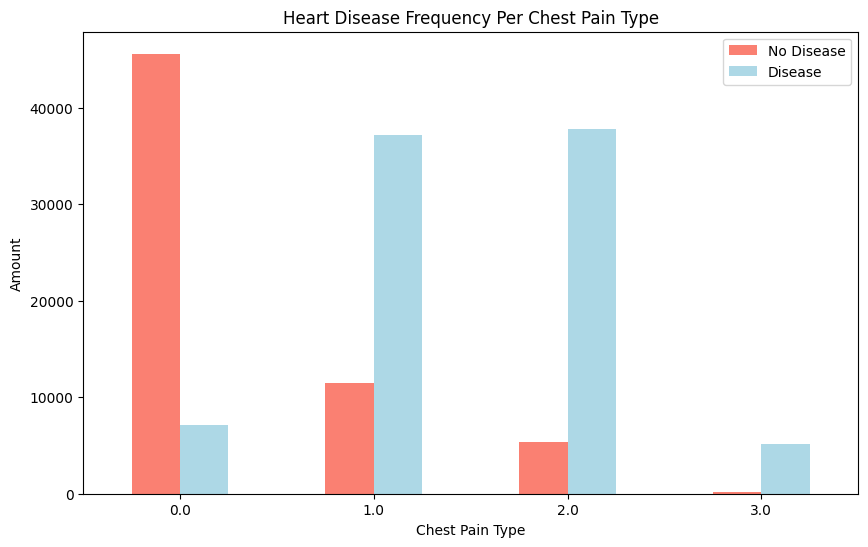

In [253]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10,6), 
                                   color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [254]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,57.0,1.0,0.0,116.0,262.0,0.0,1.0,118.0,1.0,2.0,1.0,1.0,3.0,0.0
149996,63.0,1.0,1.0,153.0,266.0,1.0,0.0,147.0,0.0,2.0,1.0,3.0,3.0,0.0
149997,56.0,0.0,0.0,127.0,299.0,0.0,0.0,160.0,0.0,0.0,2.0,1.0,2.0,1.0
149998,59.0,0.0,2.0,154.0,251.0,0.0,1.0,166.0,0.0,1.0,2.0,0.0,2.0,1.0


In [255]:
# Make a correlation matrix 
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.111821,-0.058856,0.417069,0.281592,0.129243,-0.163155,-0.675251,0.193845,0.256527,-0.217259,0.386598,0.130575,-0.286119
sex,-0.111821,1.000000,0.006889,-0.069634,-0.215703,0.068278,-0.062241,-0.090496,0.199552,0.123714,-0.005342,0.164089,0.242886,-0.301687
cp,-0.058856,0.006889,1.000000,0.073801,-0.075607,0.182930,0.061005,0.467860,-0.647143,-0.219513,0.150950,-0.316963,-0.222192,0.617183
trestbps,0.417069,-0.069634,0.073801,1.000000,0.117509,0.178880,-0.149062,-0.005704,0.125835,0.207345,-0.110840,0.102603,0.030048,-0.112488
chol,0.281592,-0.215703,-0.075607,0.117509,1.000000,0.012966,-0.176616,0.016959,0.094180,0.051926,0.011437,0.095813,0.095301,-0.063785
fbs,0.129243,0.068278,0.182930,0.178880,0.012966,1.000000,-0.084266,0.009384,0.046294,-0.007022,-0.034243,0.175792,-0.034532,0.009827
restecg,-0.163155,-0.062241,0.061005,-0.149062,-0.176616,-0.084266,1.000000,0.057982,-0.055952,-0.096322,0.156675,-0.104960,-0.009704,0.131001
thalach,-0.675251,-0.090496,0.467860,-0.005704,0.016959,0.009384,0.057982,1.000000,-0.620405,-0.518764,0.536574,-0.287197,-0.178933,0.593126
exang,0.193845,0.199552,-0.647143,0.125835,0.094180,0.046294,-0.055952,-0.620405,1.000000,0.396226,-0.361921,0.182549,0.270092,-0.652120
oldpeak,0.256527,0.123714,-0.219513,0.207345,0.051926,-0.007022,-0.096322,-0.518764,0.396226,1.000000,-0.830025,0.346425,0.289320,-0.580773


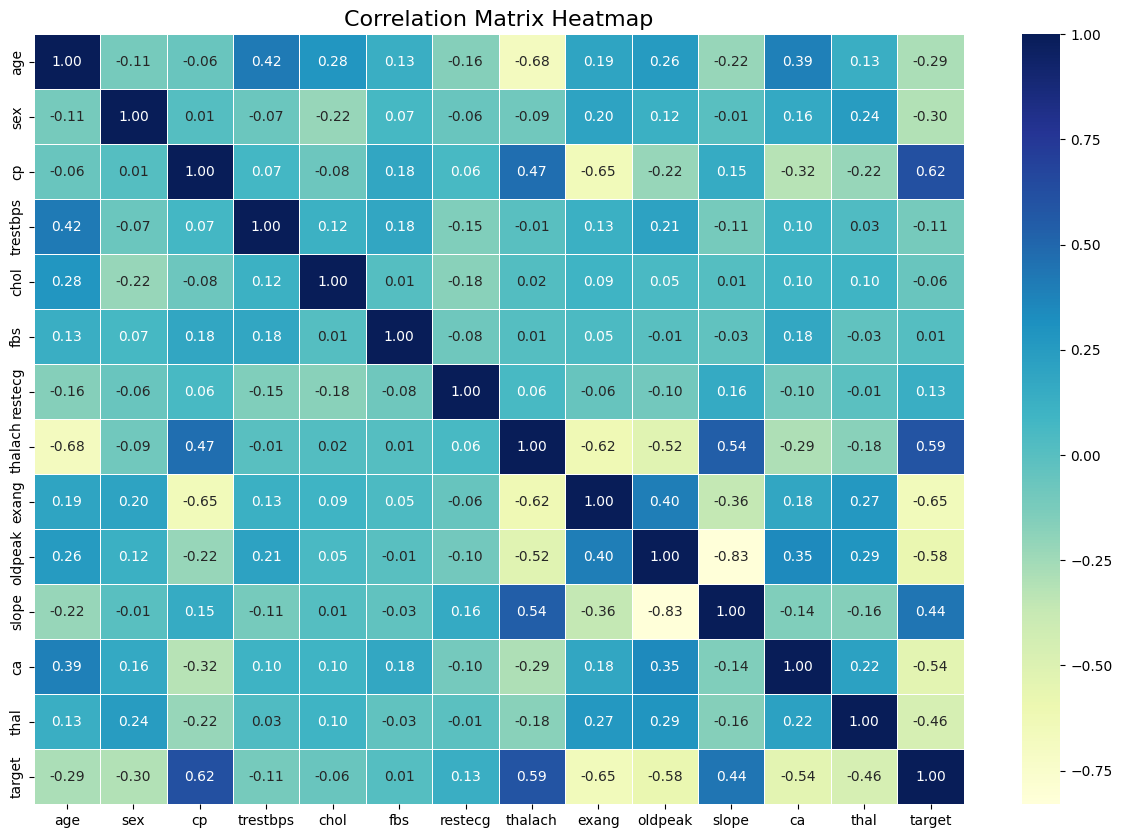

In [256]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu",  # Corrected colormap
            ax=ax)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


In [257]:
# Split data intp X and Y 
x = df.drop("target", axis = 1)

y= df["target"]

In [258]:
# Split data into train and test set 
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)

In [259]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
91804,46.0,1.0,2.0,123.0,300.0,0.0,1.0,175.0,0.0,1.0,2.0,1.0,2.0
118377,67.0,0.0,2.0,145.0,293.0,0.0,1.0,147.0,0.0,0.0,2.0,0.0,3.0
95423,39.0,1.0,1.0,121.0,160.0,0.0,1.0,177.0,0.0,0.0,2.0,0.0,2.0
138412,49.0,1.0,0.0,117.0,248.0,0.0,0.0,157.0,0.0,0.0,2.0,1.0,3.0
12626,43.0,0.0,2.0,119.0,207.0,0.0,1.0,171.0,0.0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120044,57.0,1.0,1.0,155.0,231.0,0.0,0.0,162.0,0.0,0.0,2.0,1.0,2.0
103827,54.0,1.0,1.0,109.0,297.0,0.0,1.0,156.0,0.0,0.0,2.0,0.0,3.0
132119,62.0,0.0,2.0,141.0,266.0,0.0,0.0,157.0,0.0,0.0,2.0,0.0,2.0
147067,58.0,1.0,0.0,155.0,279.0,0.0,0.0,141.0,1.0,1.0,1.0,1.0,3.0


In [260]:
y_train, len(y_train)

(91804     1.0
 118377    1.0
 95423     1.0
 138412    0.0
 12626     1.0
          ... 
 120044    0.0
 103827    1.0
 132119    1.0
 147067    0.0
 122128    0.0
 Name: target, Length: 119837, dtype: float64,
 119837)

#### Two different Models 
1. Logistic Regression 
2. Random Forest Classifier

In [261]:
# Put models in a dictionary

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
}

# Create a function to fit and score model
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    x_train: tarining data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """

    # Set random seed 
    np.random.seed(42)
    # Make a dictionary to keep model scores 
    model_scores = {}
    # Loop through models 
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores 
        model_scores[name] = model.score(x_test, y_test)
    return model_scores 

In [262]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test = x_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores 

{'Logistic Regression': 0.9593791722296395,
 'Random Forest': 0.9987983978638184}

# Testing Models on following parameters 
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Checking if model is overfitting

In [263]:
# Access the trained models
rf_model = models["Random Forest"]
log_reg_model = models["Logistic Regression"]

# Calculate training and testing accuracy for Random Forest
rf_train_acc = rf_model.score(x_train, y_train)
rf_test_acc = rf_model.score(x_test, y_test)

print("Random Forest Accuracy:")
print(f"Train Accuracy: {rf_train_acc:.4f}")
print(f"Test Accuracy : {rf_test_acc:.4f}")

# check for Logistic Regression
log_reg_train_acc = log_reg_model.score(x_train, y_train)
log_reg_test_acc = log_reg_model.score(x_test, y_test)

print("\nLogistic Regression Accuracy:")
print(f"Train Accuracy: {log_reg_train_acc:.4f}")
print(f"Test Accuracy : {log_reg_test_acc:.4f}")

Random Forest Accuracy:
Train Accuracy: 0.9993
Test Accuracy : 0.9988

Logistic Regression Accuracy:
Train Accuracy: 0.9607
Test Accuracy : 0.9594


It is likely that Random Forest model is overfitting

### Manually tuning Hyperparameter
to reduce overfitting of RandomForestClassifier 

In [264]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,            
    min_samples_split=10,    
    min_samples_leaf=4,       
    max_features='sqrt',      
    random_state=42
)

rf.fit(x_train, y_train)
print("Tuned RF Train Acc :", rf.score(x_train, y_train))
print("Tuned RF Test Acc  :", rf.score(x_test, y_test))

Tuned RF Train Acc : 0.9959278019309562
Tuned RF Test Acc  : 0.9948598130841122


In [265]:
# Update model_scores dict. and replace "Random Forest" score with tuned model's test accuracy
model_scores["Random Forest"] = rf.score(x_test, y_test)

In [266]:
model_scores

{'Logistic Regression': 0.9593791722296395,
 'Random Forest': 0.9948598130841122}

### Model Comparison

In [267]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"]).T
model_compare = model_compare * 100
model_compare

,accuracy
Logistic Regression,95.937917
Random Forest,99.485981


### Hyperparameter Tuning with RandomizedSearchCV
for LogisticRegression

In [268]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier 
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [269]:
# Tune logisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5, 
                                n_iter = 20, 
                                verbose = True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [270]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(206.913808111479)}

In [271]:
rs_log_reg.score(x_test, y_test)

0.9606809078771695

In [272]:
model_scores

{'Logistic Regression': 0.9593791722296395,
 'Random Forest': 0.9948598130841122}

### Hyperparameter Tuning with GridSearchCV

In [273]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [274]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': np.float64(206.913808111479), 'solver': 'liblinear'}

In [275]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.9606809078771695

### Evaluating and comparing our tuned machine learning classifiers using all parameters
* Accuracy
* Precision
* Recall
* F1 Score  
* ROC AUC Score
* Confusion matrix
* Classification report

In [276]:
# Initialize and train using cross calidation
log_reg = LogisticRegression(C=206.913808111479, solver="liblinear")
log_reg.fit(x_train, y_train)
rf.fit(x_train, y_train)

# Predict
log_reg_preds = log_reg.predict(x_test)
rf_preds = rf.predict(x_test)

# Probabilities for ROC-AUC
log_reg_probs = log_reg.predict_proba(x_test)[:, 1]
rf_probs = rf.predict_proba(x_test)[:, 1]

# Metrics function
def evaluate_model(name, y_true, y_pred, y_probs):
    print(f"{name} Performance:")
    print(f"Accuracy       : {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision      : {precision_score(y_true, y_pred):.4f}")
    print(f"Recall         : {recall_score(y_true, y_pred):.4f}")
    print(f"F1 Score       : {f1_score(y_true, y_pred):.4f}")
    print(f"ROC AUC Score  : {roc_auc_score(y_true, y_probs):.4f}")
    print("-" * 40)

# Compare both
evaluate_model("Logistic Regression", y_test, log_reg_preds, log_reg_probs)
evaluate_model("Random Forest", y_test, rf_preds, rf_probs)

Logistic Regression Performance:
Accuracy       : 0.9607
Precision      : 0.9626
Recall         : 0.9695
F1 Score       : 0.9661
ROC AUC Score  : 0.9952
----------------------------------------
Random Forest Performance:
Accuracy       : 0.9949
Precision      : 0.9959
Recall         : 0.9951
F1 Score       : 0.9955
ROC AUC Score  : 0.9999
----------------------------------------


### Confusion Matrix

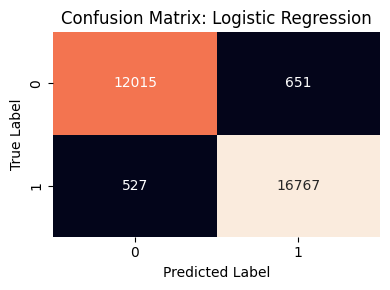

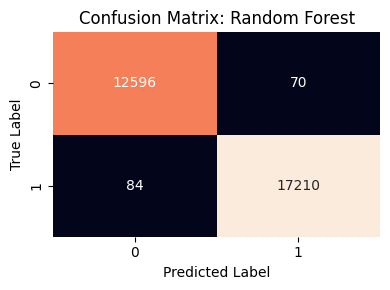

In [277]:

def plot_conf_mat(y_true, y_pred, title):
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cbar=False)
    plt.title(f'Confusion Matrix: {title}')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

plot_conf_mat(y_test, log_reg_preds, "Logistic Regression")
plot_conf_mat(y_test, rf_preds, "Random Forest")

### Classification Report

In [278]:
print("Classification Report: Logistic Regression")
print(classification_report(y_test, log_reg_preds))

print("Classification Report: Random Forest")
print(classification_report(y_test, rf_preds))

Classification Report: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     12666
         1.0       0.96      0.97      0.97     17294

    accuracy                           0.96     29960
   macro avg       0.96      0.96      0.96     29960
weighted avg       0.96      0.96      0.96     29960

Classification Report: Random Forest
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     12666
         1.0       1.00      1.00      1.00     17294

    accuracy                           0.99     29960
   macro avg       0.99      0.99      0.99     29960
weighted avg       0.99      0.99      0.99     29960



In [279]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95     12666
         1.0       0.96      0.97      0.97     17294

    accuracy                           0.96     29960
   macro avg       0.96      0.96      0.96     29960
weighted avg       0.96      0.96      0.96     29960



### ROC Curve Comparison

<Figure size 600x500 with 0 Axes>

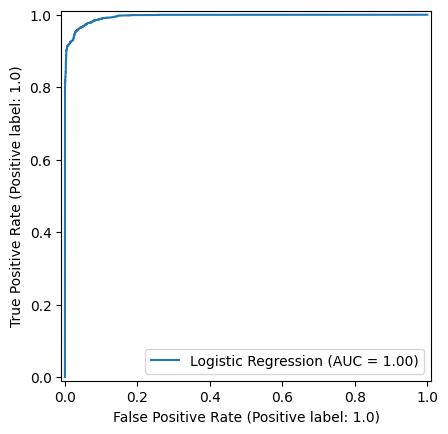

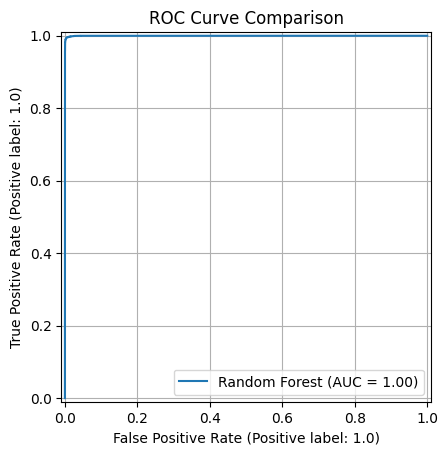

In [280]:
plt.figure(figsize=(6, 5))
RocCurveDisplay.from_estimator(log_reg, x_test, y_test, name="Logistic Regression")
RocCurveDisplay.from_estimator(rf, x_test, y_test, name="Random Forest")
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()

### Feature Importance
Logistic Regression

In [281]:
# Check coef_
log_reg.coef_

array([[ 0.16639169, -6.26491103,  4.06064964, -0.11047301, -0.01596089,
        -0.39208504,  1.18372423,  0.15424896,  0.03890929, -1.79926922,
         1.56123818, -2.58320547, -3.33540731]])

In [282]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0


In [283]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(log_reg.coef_[0])))
feature_dict

{'age': np.float64(0.16639168706565813),
 'sex': np.float64(-6.264911033163065),
 'cp': np.float64(4.060649642720609),
 'trestbps': np.float64(-0.11047300980834633),
 'chol': np.float64(-0.015960890660434015),
 'fbs': np.float64(-0.39208504311454095),
 'restecg': np.float64(1.1837242256375566),
 'thalach': np.float64(0.1542489577517184),
 'exang': np.float64(0.03890928698261687),
 'oldpeak': np.float64(-1.799269221168351),
 'slope': np.float64(1.561238182404527),
 'ca': np.float64(-2.583205470343616),
 'thal': np.float64(-3.335407314949895)}

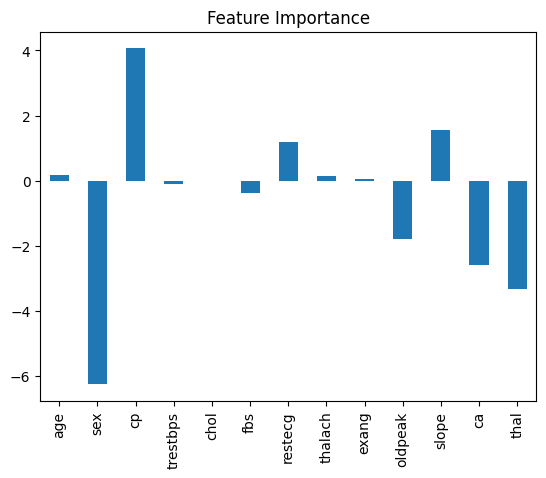

In [284]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [285]:
pd.crosstab(df["sex"], df["target"])

target,0.0,1.0
sex,,
0.0,8851,36889
1.0,53755,50302


In [286]:
pd.crosstab(df["cp"], df["target"])

target,0.0,1.0
cp,,
0.0,45585,7156
1.0,11476,37133
2.0,5398,37749
3.0,147,5153


In [287]:
pd.crosstab(df["slope"], df["target"])

target,0.0,1.0
slope,,
0.0,4680,1543
1.0,44771,27671
2.0,13155,57977


### Feature Importance
Random Forest

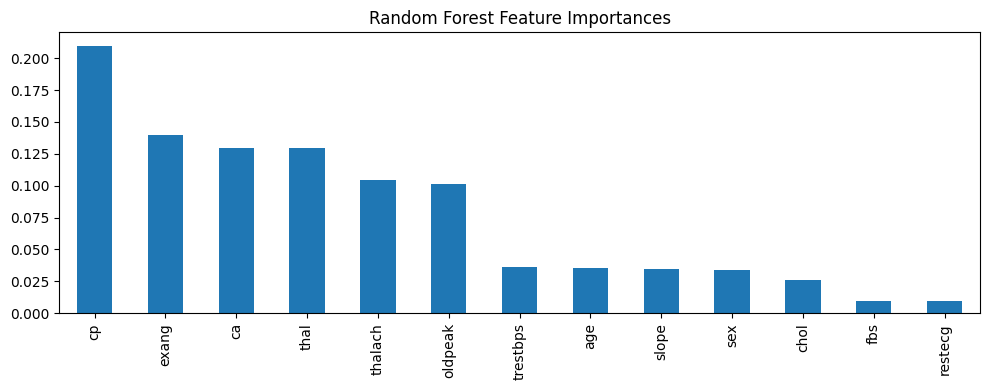

In [288]:
feature_importances = pd.Series(rf.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title="Random Forest Feature Importances")
plt.tight_layout()
plt.show()

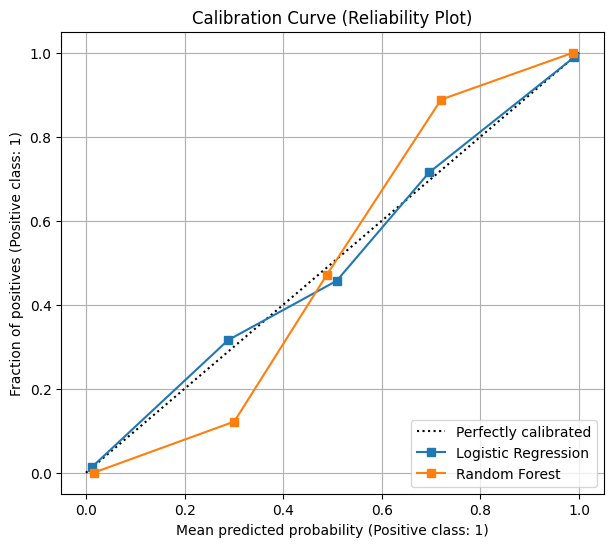

In [289]:
from sklearn.calibration import CalibrationDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import calibration_curve

plt.figure(figsize=(7, 6))

# Logistic Regression Calibration
CalibrationDisplay.from_predictions(y_test, log_reg_probs, name="Logistic Regression", ax=plt.gca())

# Random Forest Calibration
CalibrationDisplay.from_predictions(y_test, rf_probs, name="Random Forest", ax=plt.gca())

plt.title("Calibration Curve (Reliability Plot)")
plt.grid(True)
plt.show()